<a href="https://colab.research.google.com/github/jadrzy/Lab-Python-in-Data-Science-/blob/main/notebooks/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://{token}@github.com/jadrzy/Lab-Python-in-Data-Science-.git

Cloning into 'Lab-Python-in-Data-Science-'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 137 (delta 45), reused 77 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (137/137), 1.23 MiB | 5.61 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,)
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/Lab-Python-in-Data-Science-/datasets/winequality-red.csv', sep = ';') # When data separator needed

tr_data = []  # training data   60%
val_data = [] # validation data 20%
te_data = []  # test data       20%

tr_data, val_data = train_test_split(data, test_size=0.2, random_state=1)
tr_data, te_data = train_test_split(tr_data, test_size=0.25, random_state=1)

x_train = tr_data.drop('quality', axis=1)
y_train = tr_data['quality']

x_val = val_data.drop('quality', axis=1)
y_val = val_data['quality']

---
---
---
#**Task 4.1**
Split the data into training, validation, and test sets. Use the quality as the target
value – y and remember to drop it from the rest of the data. Implement linear regression
and calculate the RMSE for the training and validation sets.





In [8]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)


rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((reg.predict(x_val) - y_val)**2))

print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

RMSE for training set: 0.657364762551979
RMSE for validation set: 0.6168401876716518


---
#**Task 4.3**
Implement neural network regressor. Make predictions and calculate RMSE for
training and validation sets. Repeat this step while experimenting with your ideas for
model parameter setup.





In [17]:
# simply with almost default parameters
reg = MLPRegressor(random_state=1, max_iter=500)
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print('Before customization:')
print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

# and then try some customization, for example:
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000,
solver='lbfgs')
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print('After customization:')
print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

%reset -f

Before customization:
RMSE for training set: 0.6458194285724739
RMSE for validation set: 0.6465106518834732
After customization:
RMSE for training set: 0.6433578114974701
RMSE for validation set: 0.614237830526765


---
#**Task 4.4**
Compare regression performance (with one selected model) using all features
versus a selected subset of features. Start by choosing two features, then four, and suggest
your concepts. Remember that the correlation matrix is useful for feature selection in
regression.





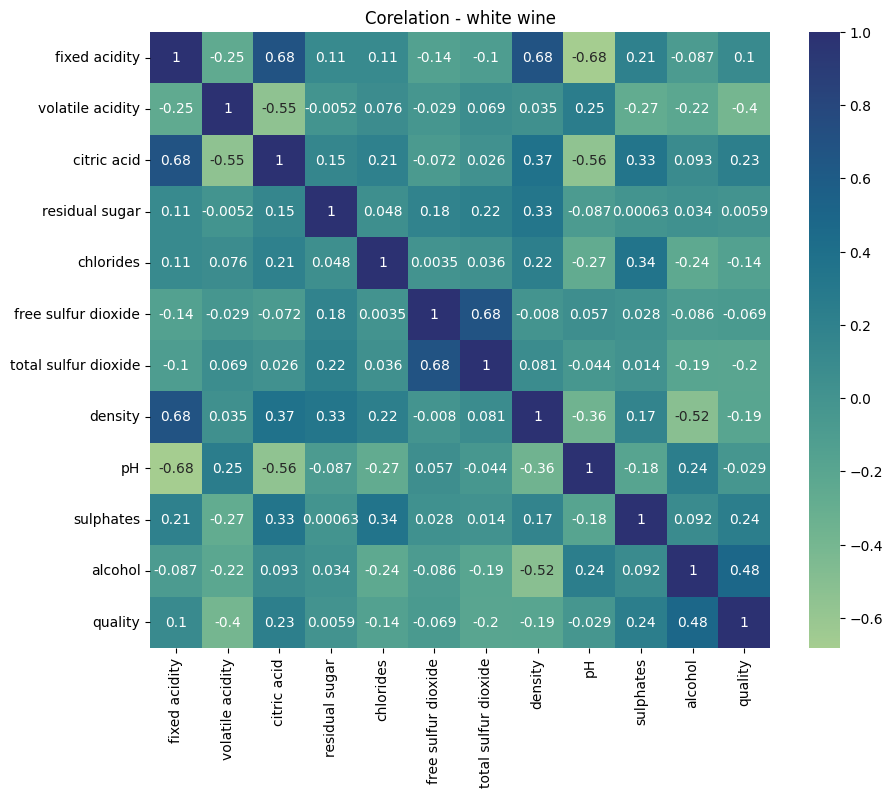


Features: all
RMSE for training set: 0.6500489887015303
RMSE for validation set: 0.6163723902357795

Features: volatile acidity, alcohol
RMSE for training set: 0.6809193962496436
RMSE for validation set: 0.6343250318541099

Features: volatile acidity, alcohol, citric acid, sulphates
RMSE for training set: 0.6500489887015303
RMSE for validation set: 0.6163723902357795


In [28]:
# correlation
corr_w = tr_data.corr()
plt.figure(figsize=(10, 8))
heatmap_w = sns.heatmap(corr_w, cmap='crest', annot=True)
heatmap_w.set_title('Corelation - white wine')
plt.show()

# FEATURES: all
reg = MLPRegressor(random_state=1, max_iter=500)
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print('\nFeatures: all')
print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

# FEATURES: volatile acidity, alcohol
tr_data_sub = tr_data[['volatile acidity', 'alcohol']]
val_data_sub = val_data[['volatile acidity', 'alcohol']]
x_train = tr_data_sub
x_val = val_data_sub
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print('\nFeatures: volatile acidity, alcohol')
print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

# FEATURES: volatile acidity, alcohol, citric acid, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'citric acid', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'citric acid', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print('\nFeatures: volatile acidity, alcohol, citric acid, sulphates')
print(f'RMSE for training set: {rmse_train}')
print(f'RMSE for validation set: {rmse_val}')

%reset -f

---
#**Task 4.6**
Implement the logistic regression model, train it, and make predictions on
training and validation sets. Check its accuracy.
Hint: If an error occurs, read the message carefully; it should indicate possible solutions.


In [40]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

%reset -f

Accuracy for training set: 0.7601668404588112
Accuracy for validation set: 0.753125


---
#**Task 4.7**
Use the logistic regression model, but only with selected features. Compare the
accuracy of two scenarios by selecting four different features in each:
1.   'alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates',
2.   'pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity'.


Compare the accuracy between the two cases.

In [64]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000

# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

# FEATURES: ph, free sulfur dioxide, residual sugar, fixed acidity
tr_data_sub = tr_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
val_data_sub = val_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: ph, free sulfur dioxide, residual sugar, fixed acidity')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

%reset -f


Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.762252346193952
Accuracy for validation set: 0.753125

Features: ph, free sulfur dioxide, residual sugar, fixed acidity
Accuracy for training set: 0.5912408759124088
Accuracy for validation set: 0.565625


---
#**Task 4.8**
Implement the SVM model. Try different kernels using the kernel parameter.

In [84]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

print('\nSupport vector machine')


###############################################################################################
## KERNEL = RBF
print('\n\n-------------------------------------------------------------------------')

print('\nkernel = rbf')


clf = svm.SVC(kernel='rbf')
clf.max_iter = 1000

# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

# FEATURES: ph, free sulfur dioxide, residual sugar, fixed acidity
tr_data_sub = tr_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
val_data_sub = val_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: ph, free sulfur dioxide, residual sugar, fixed acidity')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')



###############################################################################################
## KERNEL = SIGMOID
print('\n\n-------------------------------------------------------------------------')

print('\nkernel = sigmoid')


clf = svm.SVC(kernel='sigmoid')
clf.max_iter = 1000

# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

# FEATURES: ph, free sulfur dioxide, residual sugar, fixed acidity
tr_data_sub = tr_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
val_data_sub = val_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: ph, free sulfur dioxide, residual sugar, fixed acidity')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')



###############################################################################################
## KERNEL = LINEAR
print('\n\n-------------------------------------------------------------------------')

print('\nkernel = linear')


clf = svm.SVC(kernel='linear')
clf.max_iter = 1000

# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

# FEATURES: ph, free sulfur dioxide, residual sugar, fixed acidity
tr_data_sub = tr_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
val_data_sub = val_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: ph, free sulfur dioxide, residual sugar, fixed acidity')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')


%reset -f


Support vector machine


-------------------------------------------------------------------------

kernel = rbf

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.6266944734098019
Accuracy for validation set: 0.640625

Features: ph, free sulfur dioxide, residual sugar, fixed acidity
Accuracy for training set: 0.5683003128258602
Accuracy for validation set: 0.5375


-------------------------------------------------------------------------

kernel = sigmoid

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.5912408759124088
Accuracy for validation set: 0.60625

Features: ph, free sulfur dioxide, residual sugar, fixed acidity
Accuracy for training set: 0.5328467153284672
Accuracy for validation set: 0.515625


-------------------------------------------------------------------------

kernel = linear

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training se

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


---
#**Task 4.9**
Implement multi-layer perceptron. Set your own configuration for the
parameters. Some of these were described in the section covering regression.

In [97]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

clf = MLPClassifier(hidden_layer_sizes=(15, 10, 5), random_state=1, max_iter=10000,
solver='lbfgs')

print('\nMulti-layer Perceptron')


# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

# FEATURES: ph, free sulfur dioxide, residual sugar, fixed acidity
tr_data_sub = tr_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
val_data_sub = val_data[['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: ph, free sulfur dioxide, residual sugar, fixed acidity')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

%reset -f


Multi-layer Perceptron

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.7601668404588112
Accuracy for validation set: 0.76875

Features: ph, free sulfur dioxide, residual sugar, fixed acidity
Accuracy for training set: 0.6777893639207507
Accuracy for validation set: 0.53125


---
#**Task 4.11**
You’ve probably achieved around 70-75% accuracy so far. Try improving the
performance of the models by tuning their parameters.

In [120]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

### TUNING PARAMETERS ###
#####################################################################################

clf = MLPClassifier()
clf.hidden_layer_sizes = (25, 5, 10, 5)
clf.random_state = 1
clf.max_iter = 100000
clf.solver = 'lbfgs'

#####################################################################################

print('\nMulti-layer Perceptron')


# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')

%reset -f


Multi-layer Perceptron

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.762252346193952
Accuracy for validation set: 0.771875


---
#**Task 4.12**
Select the model (with tuned parameters) that performs best for you. Now, train
it on both the training and validation sets and check its final performance on the test
subset.

In [131]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5

### TUNING PARAMETERS ###
#####################################################################################

clf = MLPClassifier()
clf.hidden_layer_sizes = (25, 5, 10, 5)
clf.random_state = 1
clf.max_iter = 10000
clf.solver = 'lbfgs'

#####################################################################################

print('\nMulti-layer Perceptron')


# FEATURES: volatile acidity, alcohol, total sulfur dioxide, sulphates
tr_data_sub = tr_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
val_data_sub = val_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
te_data_sub = te_data[['volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates']]
x_train = tr_data_sub
x_val = val_data_sub
x_test = te_data_sub

clf.fit(x_train, y_train)
#clf.fit(x_val, y_val)

y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)
y_pred_test = clf.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)
acc_test = accuracy_score(y_test, y_pred_test)

print('\nFeatures: volatile acidity, alcohol, total sulfur dioxide, sulphates')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')
print(f'Accuracy for test set: {acc_test}')

%reset -f


Multi-layer Perceptron

Features: volatile acidity, alcohol, total sulfur dioxide, sulphates
Accuracy for training set: 0.762252346193952
Accuracy for validation set: 0.771875
Accuracy for test set: 0.7125


---
#**Task 4.13**
Implement a pipeline with two steps: standardization and a neural network.
Choose a reasonable size for the network and compare its performance with and without
feature scaling, using the stochastic gradient descent ('sgd') algorithm for learning.

In [154]:
y_train = tr_data['quality'] > 5.5
y_val = val_data['quality'] > 5.5
y_test = te_data['quality'] > 5.5


clf = Pipeline([("mlp", MLPClassifier(max_iter=50))])
clf.set_params(mlp__solver='sgd')
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\n\nWithout scaler')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')




clf = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=50))])
clf.set_params(mlp__solver='sgd')
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_val)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print('\n\nWith scaler')
print(f'Accuracy for training set: {acc_train}')
print(f'Accuracy for validation set: {acc_val}')



Without scaler
Accuracy for training set: 0.5881126173096975
Accuracy for validation set: 0.559375


With scaler
Accuracy for training set: 0.7382690302398331
Accuracy for validation set: 0.753125
